In [12]:
%run kp00_load_packages.ipynb

In [13]:
df['aa_sequence_aligned'] = df.apply(lambda row: insert_mutations(WT_SEQs_ALIGNED[row.gene], row.aa_genotype_pseudo.split(':')) if row.aa_genotype_pseudo!='wt' else WT_SEQs_ALIGNED[row.gene], axis=1)
df['aa_sequence'] = [sq.replace('-','') for sq in df.aa_sequence_aligned]
df['log_brightness'] = [np.log10(x) for x in df.replicates_mean_brightness]

In [14]:
df.columns

Index(['Unnamed: 0', 'aa_genotype_pseudo', 'gene', 'total_cell_count',
       'n_replicates', 'replicates_stdev_weighted',
       'replicates_mean_brightness', 'ddG_monomer', 'ddG_monomer_stdev',
       'ddG_dimer', 'ddG_dimer_stdev', 'aa_genotype_native',
       'aa_sequence_aligned', 'aa_sequence', 'log_brightness'],
      dtype='object')

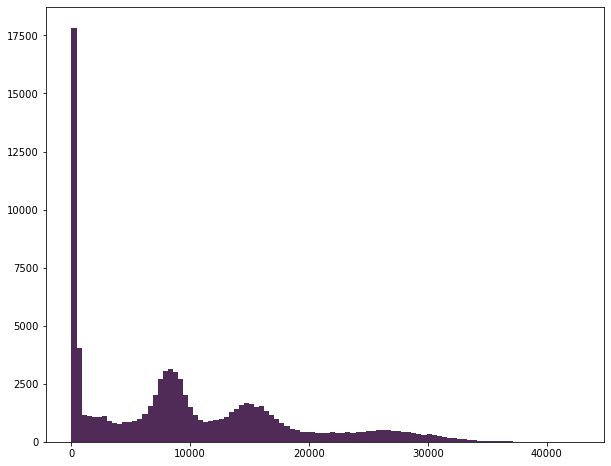

In [15]:
plt.figure(figsize=[10,8])
plt.hist(df.replicates_mean_brightness, bins=100);

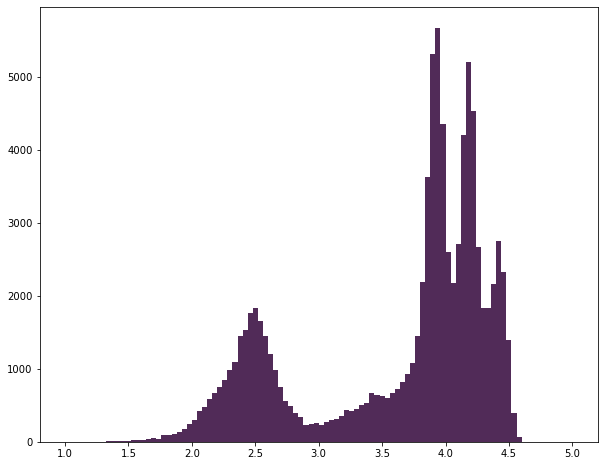

In [16]:
plt.figure(figsize=[10,8])
plt.hist(df.log_brightness, range=[1, 5], bins=100);

In [17]:
min(df.log_brightness), max(df.log_brightness)

(-14.262760251217674, 4.630545947305961)

In [18]:
df.log_brightness = np.clip(df.log_brightness, 1, 5)

In [19]:
df = df[['aa_sequence', 'gene', 'aa_genotype_pseudo', 'log_brightness', 'replicates_stdev_weighted']]
df.columns = ['aa_sequence', 'gene', 'aa_mutations_pseudo', 'log_brightness', 'brightness_std']

In [20]:
df.to_csv('3_data/ranked_sequences.csv')

In [21]:
df

,aa_sequence,gene,aa_mutations_pseudo,log_brightness,brightness_std
0,MSKGEELFTGIVPVLIELDGDVHGHKFSVRGEGEGDADYGKLEIKF...,amacGFP,*246G,3.976523,0.000000e+00
1,MSKGEELFTGIVPVLIELDGDVHGHKFSVRGEGEGDADYGKLEIKF...,amacGFP,*246L,3.949572,0.000000e+00
2,MSKGEELFTGIVPVLIELDGDVHGHKFSVRGEGEGDADYGKLEIKF...,amacGFP,*246R,3.969685,0.000000e+00
3,MSKGEELFTGIVPVLIELDGDVHGHKFSVRGEGEGDADYGKLEIKF...,amacGFP,*246W,3.989683,0.000000e+00
4,MSKGEELFTGIVPVLIELDGDVHGHKFSVRGEGEGDADYGKLEIKF...,amacGFP,A160D,3.955111,1.818989e-12
...,...,...,...,...,...
92383,MPAMKIECRITGTLNGVEFELVGGGEGTPEQGRMTNKMKSTKGALT...,ppluGFP,Y95S:N222Y,4.081156,0.000000e+00
92384,MPAMKIECRITGTLNGVEFELVGGGEGTPEQGRMTNKMKSTKGALT...,ppluGFP,Y95S:R99C:F113S,2.483638,0.000000e+00
92385,MPAMKIECRITGTLNGVEFELVGGGEGTPEQGRMTNKMKSTKGALT...,ppluGFP,Y95S:S192G,4.110760,0.000000e+00
92386,MPAMKIECRITGTLNGVEFELVGGGEGTPEQGRMTNKMKSTKGALT...,ppluGFP,Y95S:Y103C,3.813313,0.000000e+00
